8
8
CR
CHEST
(1024, 1024)
(1024, 256)
(256, 1024)
(512, 512)


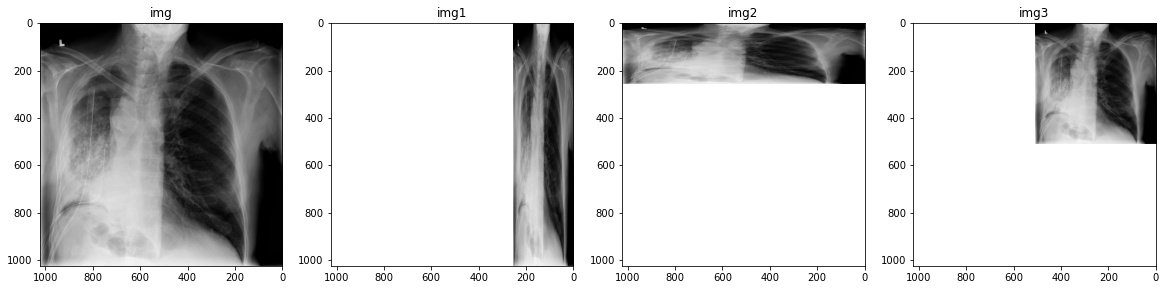

253
1


True

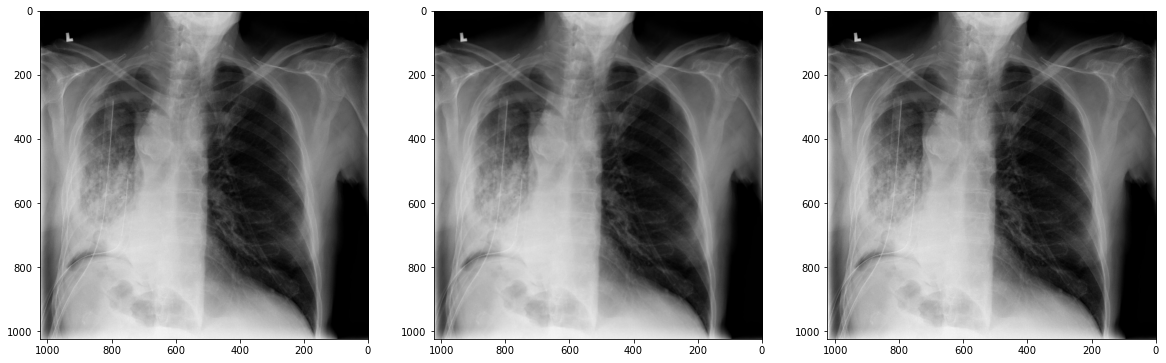

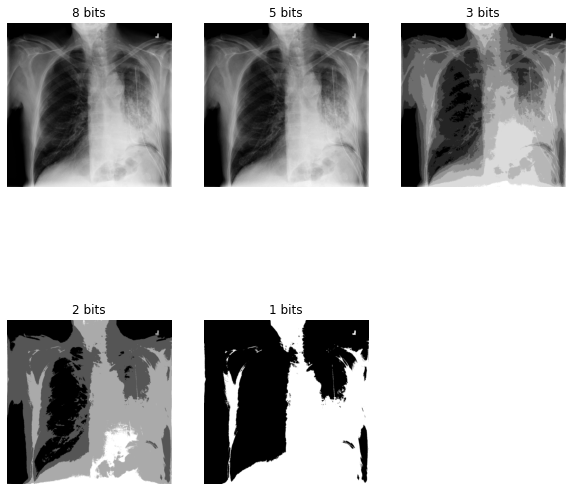

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pydicom

#A
img = pydicom.dcmread('file2.dcm')

#B

print(img.BitsAllocated )
print(img.BitsStored)
print(img.Modality)
l = 2**(img.BitsStored) - 1
print(img.BodyPartExamined )

#C
img = img.pixel_array
print(img.shape)
x,y = img.shape
img1 = np.zeros((img.shape[0], img.shape[1]//4))
print(img1.shape)

for i in range (img.shape[0]):
    m = 0
    for j in range(0,img.shape[1],4):
        img1[i,m] = img[i,j]
        m = m + 1


img2 = np.zeros((img.shape[0]//4, img.shape[1]))
print(img2.shape)
m = 0

for i in range (0,img.shape[0],4):
    m = m + 1 
    for j in range(img.shape[1]):
        img2[m-1,j] = img[i,j]

plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1)
plt.title('img')
plt.imshow(img, cmap='gray', vmin=0, vmax=l)
plt.xlim([x, 0]) 
plt.ylim([y, 0]) 

plt.subplot(1, 4, 2)
plt.title('img1')
plt.imshow(img1, cmap='gray', vmin=0, vmax=l)
plt.xlim([x, 0]) 
plt.ylim([y, 0]) 


plt.subplot(1, 4, 3)
plt.title('img2')
plt.imshow(img2, cmap='gray', vmin=0, vmax=l)
plt.xlim([x, 0]) 
plt.ylim([y, 0]) 


#D
img3 = np.zeros((img.shape[0]//2, img.shape[1]//2))
print(img3.shape)
m = 0

for i in range (0,img.shape[0],2):
    n = 0
    m = m + 1
    for j in range(0,img.shape[1],2):
        img3[m-1,n] = img[i,j]
        n = n + 1
plt.subplot(1, 4, 4)
plt.title('img3')
plt.imshow(img3, cmap='gray', vmin=0, vmax=l)
plt.xlim([x, 0]) 
plt.ylim([y, 0]) 
  
plt.show()

#F
img_stretch1=cv.resize(img3,(0,0),fx=2,fy=2,interpolation=cv.INTER_NEAREST)
img_stretch2=cv.resize(img3,(0,0),fx=2,fy=2,interpolation=cv.INTER_LINEAR)
img_stretch3=cv.resize(img3,(0,0),fx=2,fy=2,interpolation=cv.INTER_CUBIC)

plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)
plt.imshow(img_stretch1, cmap='gray', vmin=0, vmax=l)
plt.xlim([x, 0]) 
plt.ylim([y, 0]) 
  
plt.subplot(1, 3, 2)
plt.imshow(img_stretch2, cmap='gray', vmin=0, vmax=l)
plt.xlim([x, 0]) 
plt.ylim([y, 0]) 
  
plt.subplot(1, 3, 3)
plt.imshow(img_stretch3, cmap='gray', vmin=0, vmax=l)
plt.xlim([x, 0]) 
plt.ylim([y, 0]) 
  
#G
print(np.max(img))
def func(img, bits):
    img1 = np.zeros((img.shape[0], img.shape[1]))
    img1 = ((img / np.max(img)) * (2 ** bits - 1))
    img1 = np.around(img1).astype(np.uint8)
    #img1 = (img1 * (255 / (2 ** bits - 1))).astype(np.uint8)

    return img1


plt.figure(figsize=(10,10))
plt.subplot(2, 3, 1)
plt.title('8 bits')
plt.imshow(func(img, 8), cmap='gray', vmin=0 , vmax = 255)
plt.axis(False)

plt.subplot(2, 3, 2)
plt.title('5 bits')
plt.imshow(func(img, 5), cmap='gray', vmin=0 , vmax = 31)
plt.axis(False)

plt.subplot(2, 3, 3)
plt.title('3 bits')
plt.imshow(func(img, 3), cmap='gray', vmin=0 , vmax =7)
plt.axis(False)

plt.subplot(2, 3, 4)
plt.title('2 bits')
plt.imshow(func(img, 2), cmap='gray', vmin=0 , vmax =3)

plt.axis(False)

plt.subplot(2, 3, 5)
plt.title('1 bits')
plt.imshow(func(img, 1), cmap='gray' ,vmin=0 , vmax =1)
plt.axis(False)
print(np.max(func(img,1)))

#H
img_final = func(img, 8)
cv.imwrite('img_final.tif', img_final)
cv.imwrite('img_final1.bmp',img_final)